# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [0]:
import pandas as pd

In [0]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [64]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [65]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [66]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

### Исправления ошибок

In [67]:
import numpy as np
import random

data.dtypes
# data.info
# data.describe

# Subject. Опечаток нет
data[(data.Subject != "Math") & (data.Subject != "Por")]

# school. Опечаток нет
data[(data.school != "GP") & (data.school != "MS")]

# sex. Опечатки: присутсвует m вместо M
data[(data.sex != "F") & (data.sex != "M")]
# Исправление опечатки
data.sex = data.sex.replace("m", "M")

# Проверка всех возростов на отсутствия опечаток
data[(data.age <= 0) & (data.age >= 100)]

# address. Опечаток нет
data[(data.address != "U") & (data.address != "R")]

# famsize. Опечаток нет
data[(data.famsize != "GT3") & (data.famsize != "LE3")]

# Pstatus. Опечатки: присутсвует t вместо T
data[(data.Pstatus != "T") & (data.Pstatus != "A")]
# Исправление опечаток
data.Pstatus = data.Pstatus.replace("t", "T")

# Medu. Fedu. Опечатки: присутствует о вместо 0
data.Medu = data.Medu.apply(str)
data.Fedu = data.Fedu.apply(str)
data[(data.Medu != '0')& (data.Medu != '1') & (data.Medu != "2") & (data.Medu != "3") & (data.Medu != '4')]
data[(data.Fedu != '0') & (data.Fedu != '4') & (data.Fedu != '1') & (data.Fedu != "2") & (data.Fedu != "3")]
data.Medu = data.Medu.replace("o", "0")
data.Fedu = data.Fedu.replace("o", "0")
data.Medu = data.Medu.apply(pd.to_numeric)
data.Fedu = data.Fedu.apply(pd.to_numeric)

# Mjob. Fjob. Опечатки: присутствует at-home вместо at_home
data[(data.Mjob != "teacher") & (data.Mjob != "health") & (data.Mjob != "services") & (data.Mjob != "at_home") & (data.Mjob != "other")]
data.Mjob = data.Mjob.replace("at-home", "at_home")
data[(data.Fjob != "teacher") & (data.Fjob != "health") & (data.Fjob != "services") & (data.Fjob != "at_home") & (data.Fjob != "other")]
data.Fjob = data.Fjob.replace("at-home", "at_home")

# Опечаток нет
data[(data.reason != "home") & (data.reason != "reputation") & (data.reason != "course") & (data.reason != "other")]

# guardian. Опечатки: присутствует futher вместо father
data[(data.guardian != "mother") & (data.guardian != "father") & (data.guardian != "other")]
data.guardian = data.guardian.replace("futher", "father")

# Опечаток нет
data[(data.traveltime != 0)& (data.traveltime != 1) & (data.traveltime != 2) & (data.traveltime != 3) & (data.traveltime != 4)]

# Опечаток нет
data[(data.studytime != 0)& (data.studytime != 1) & (data.studytime != 2) & (data.studytime != 3) & (data.studytime != 4)]

# Опечаток нет
data[(data.failures != 0)& (data.failures != 1) & (data.failures != 2) & (data.failures != 3) & (data.failures != 4)]

# Опечаток нет
data[(data.schoolsup != "yes") & (data.schoolsup != "no")]

# Опечаток нет
data[(data.famsup != "yes") & (data.famsup != "no")]

# Опечаток нет
data[(data.paid != "yes") & (data.paid != "no")]

# Опечаток нет
data[(data.activities != "yes") & (data.activities != "no")]

# Опечаток нет
data[(data.nursery != "yes") & (data.nursery != "no")]

# Опечаток нет
data[(data.higher != "yes") & (data.higher != "no")]

# Опечаток нет
data[(data.internet != "yes") & (data.internet != "no")]

# Опечаток нет, но есть NaN
data[(data.romantic != "yes") & (data.romantic != "no")]


# data.famrel = data.famrel.apply('int64')
data[(data.famrel < 0) | (data.famrel > 5)]


data[(data.freetime < 0) | (data.freetime > 5)]


data[(data.goout < 0) | (data.goout > 5)]


# data.Dalc = data.Dalc.apply('int64') # NaN. Не меняю тип иначе вместо НаН будет -9223372036854775808
# data[(data.Dalc < 0.0) | (data.Dalc > 5.0)]
data[(data.Dalc != 0.0) & (data.Dalc != 1.0) & (data.Dalc != 2.0) & (data.Dalc != 3.0) & (data.Dalc != 4.0) & (data.Dalc != 5.0)]

# data.Walc = data.Walc.apply('int64') # NaN. менять тип не стоит
data[(data.Walc != 0.0) & (data.Walc != 1.0) & (data.Walc != 2.0) & (data.Walc != 3.0) & (data.Walc != 4.0) & (data.Walc != 5.0)]
# data[(data.Walc < 0) | (data.Walc > 5)]


# data[(data.health < 0) | (data.health > 5)]
data[(data.health != 0) & (data.health != 1) & (data.health != 2) & (data.health != 3) & (data.health != 4) & (data.health != 5)]

# Опечаток нет
data[(data.absences < 0) | (data.absences > 100)]

# NaN Опечаток нет
data[(data.cheating != "yes") & (data.cheating != "no")]

# Опечаток и NaN нет
data[(data.G1 < 0) | (data.G1 > 20)]
data[(data.G2 < 0) | (data.G2 > 20)]
data[(data.G3 < 0) | (data.G3 > 20)]

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3


### Удаление выбросов и пропусков

In [68]:
# your code here
for i in list(data):
  if data[i].isnull().values.any():
    print(i, 'have NaN')

# Заполняем случайным образом
data['romantic'].fillna(random.choice(["yes", "no"]), inplace=True)

# Заполняем случайным образом
data['cheating'].fillna(random.choice(["yes", "no"]), inplace=True)

# Заполняем пропуски средним значением
data['famrel'].fillna(data.famrel.mean(), inplace=True)

# Заполняем пропуски медианой
data['Dalc'].fillna(data.Dalc.median(), inplace=True)

# Заполняем пропуски модой
data['Walc'].fillna(data.Walc.mode(), inplace=True)

# Выбросы
data = data[(data.G3 > 1)]
data = data[(data.G3 <= 20)]

romantic have NaN
famrel have NaN
Dalc have NaN
Walc have NaN
cheating have NaN


### Оцените значимость признаков для итоговой оценки

id - просто номер студента, который никак не может влиять на итоговую оценку.

Subject - наверное нет. Потанцеально успеваемость самого студента по предмету не будет никак влиять. Вот если бы были данные ещё и по другим предметам, то возможно был бы значимый признак.

school - незначимый, потому что не важно какая школа. Мы кроме названия не знаем чем они отличаются.

sex - незначимый. (иначе это был какой-то сексизм).

age - наверное не влияет. Ну потенциально чем ты старше, тем больше у тебя опыта и знаний, но времени зато меньше. Ну я бы не стал добавлять, слишком непонятно как это может влиять на итоговую.

address - наверное нет. Я не вижу какой-то серьезной связи с итоговой.

famsize - наверное нет. По сути коэфицент значимости будет очень маленький, но если появится ученик например с 10 братьями и сестрами, то его итоговая резко станет меньше, ну или больше. Это не логично.

Pstatus - наверное нет.

Medu - значимый признак.

Fedu - значимый признак.

Mjob - незначимый.

Fjob - незначимый.

reason - не знаю.

guardian - незначимый. Слишком незначительно влияет на итоговую.

traveltime - незначимый. Слишком незначительно влияет на итоговую.

studytime - значимый. Очевидно влияет на итоговую.

failures - значимый. Очевидно влияет на предсказание итоговой.

schoolsup - значимый. Очевидно влияет на итоговую.

famsup - незначимый. Уже есть пункт с дополнительной помощью в учёбе. Надеюсь я правильно понимаю, что это просто уточнение какая именно дополнительная помощь.

paid - незначимый. Уже есть пункт с дополнительной помощью в учёбе. Надеюсь я правильно понимаю, что это просто уточнение какая именно дополнительная помощь.

activities - незначимый. Занятия по футблолу никак не скажутся на знаниях математики или португальского. Вот на физкультуру могут.

nursery - незначимый. Детский сад не даёт каких-то особенных знаний и к 15-17 годам нет никакой разницы ходил ученик в дет. сад или нет.

higher - не знаю. Мб и влияет, но я бы не стал включать.

internet - значимый. В наше время это очень важный фактор и отсутсвие интернета сделало бы выполнение этой лабораторной существенно труднее, я бы сказал практически нереально.

romantic - незначимый. Очевидно никак не влияет. Уже есть признаки времени учебы и пропусков

famrel - не знаю. 

freetime - незначимый. У нас уже есть столюец пропусков занятий и времени на учёбу.

goout - незначимый. У нас уже есть столюец пропусков занятий и времени на учёбу. И прогулки с друзьями не означают, что ученик пропускает занятия или не делает задания.

Dalc - незначимый. У нас уже есть столюец пропусков занятий и времени на учёбу. И Употребление алкоголя с друзьями в будние не означает, что ученик пропускает занятия или не делает задания.

Walc - незначимый. У нас уже есть столюец пропусков занятий и времени на учёбу. Употребление алкоголя с друзьями на выходнях не означает, что ученик пропускает занятия или не делает задания.

health - незначимый. У нас уже есть столюец пропусков занятий и времени на учёбу.

absences - значимый. На прямую влияет на количество знаний полученных именно в школе и на связь с уичтелями, а значит и на оценку. В идеале за пропуски ставят 0(как например на контрольной, которую я проспал и сам виноват((( )

cheating - не знаю.

G1 - значимый. Оценка важна.

G2 - значимый. Оценка важна.


### Исключите из выборки незначимые признаки

In [0]:
del data['ID']
del data['Subject']
del data['school']
del data['sex']
del data['age']
del data['address']
del data['famsize']
del data['Pstatus']
del data['Mjob']
del data['Fjob']
del data['reason']
del data['guardian']
del data['traveltime']
del data['nursery']
del data['famrel']
del data['famsup']
del data['paid']
del data['freetime']
del data['goout']
del data['Walc']
del data['Dalc']
del data['health']
del data['G2'] # для 2 задания

### Приведение признаков к числовому виду


In [0]:
for i in data:
    if data[i].dtype == 'object':
        data = pd.concat([data, pd.get_dummies(data[i], prefix = i)], axis = 1)
        data.drop([i], axis = 1, inplace=True)

In [0]:
data2 = data[::]

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

### Линейная регрессия + регуляризация

In [0]:
X = data.drop('G3', axis=1)
X2 = data.drop(['G1', 'G3'], axis=1)

In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

In [0]:
def modelplot(x, y, x2, y2, coef=None):
  plt.subplot(1, 3, 1)
  plt.title("With G1")
  plt.plot(x[1:100].values, 'b-', label='true')
  plt.plot(y[1:100], 'r-', label='pred')
  plt.xlabel("observations")
  plt.ylabel("G3")
  plt.legend(loc='best')

  plt.subplot(1, 3, 2)
  plt.title("Without G1")
  plt.plot(x2[1:100].values, 'b-', label='true')
  plt.plot(y2[1:100], 'r-', label='pred')
  plt.xlabel("observations")
  plt.ylabel("G3")
  plt.legend(loc='best')
  plt.show()
  if coef is not None:
    plt.subplot(1, 3, 3)
    plt.title("With G1")
    plt.bar(list(X.columns), coef)
    plt.show()

In [0]:
def characteristics(p, y, p2, y2):
  mse = metrics.mean_squared_error(y_pred=p, y_true=y)
  rmse = np.sqrt(mse)
  mae = metrics.mean_absolute_error(y_pred=p, y_true=y)
  medae = metrics.median_absolute_error(y_pred=p, y_true=y)
  R2 = metrics.r2_score(y_pred=p, y_true=y)
  print("With G1\nMSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

  mse = metrics.mean_squared_error(y_pred=p2, y_true=y2)
  rmse = np.sqrt(mse)
  mae = metrics.mean_absolute_error(y_pred=p2, y_true=y2)
  medae = metrics.median_absolute_error(y_pred=p2, y_true=y2)
  R2 = metrics.r2_score(y_pred=p2, y_true=y2)
  print("\nWithout G1\nMSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

With G1
MSE:   1.8256823530181823
RMSE:  1.351178135190983
R2:    0.7911423607493447
MAE:   1.0663027348593124
MedAE: 0.8572136979500966

Without G1
MSE:   6.026994797632201
RMSE:  2.4549938487972227
R2:    0.22554768320013086
MAE:   1.9769557725554145
MedAE: 1.6210414828194182


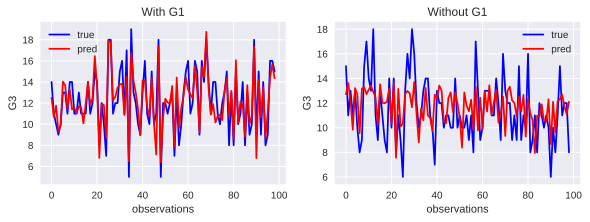

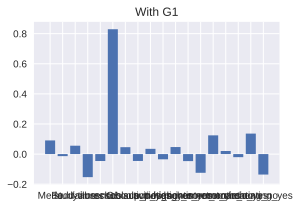

With G1
MSE:   2.37803521809602
RMSE:  1.5420879411032369
R2:    0.7618368399117217
MAE:   1.16806781630656
MedAE: 0.9547606595040072

Without G1
MSE:   7.589681639722566
RMSE:  2.7549376834553927
R2:    0.045057114419232325
MAE:   2.2458175770134132
MedAE: 1.9619250565998776


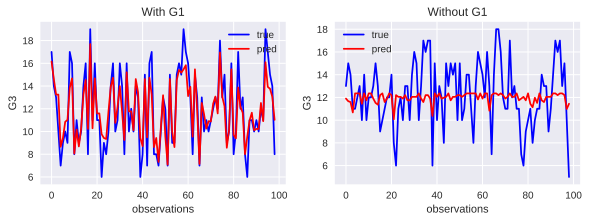

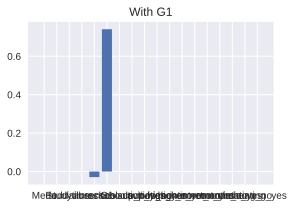

With G1
MSE:   1.7909797404019365
RMSE:  1.3382749121170645
R2:    0.7831046804417461
MAE:   1.0798156796775653
MedAE: 0.8583157079029347

Without G1
MSE:   6.877451061699151
RMSE:  2.62248947790056
R2:    0.13227583418503963
MAE:   2.121115557953116
MedAE: 1.8640131904276114


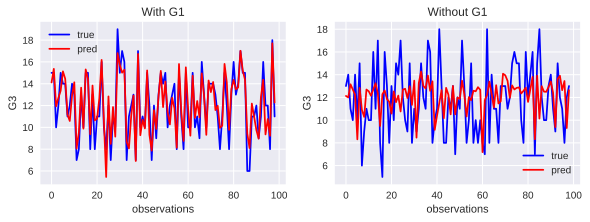

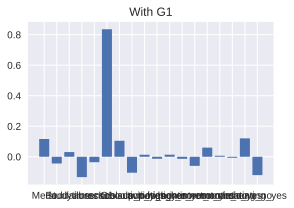

In [76]:
lasso = Lasso()
ridge = Ridge()
linear = LinearRegression()


for model in [linear, lasso, ridge]:
  (trainData_X, testData_X, trainData_Y, 
  testData_Y) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)
  (trainData_X2, testData_X2, trainData_Y2, 
  testData_Y2) = train_test_split(X2, data['G3'], test_size=0.2, shuffle=True)
  
  # Создание и обучение
  model.fit(trainData_X, trainData_Y)
  # Предсказание на тестовой выборке
  predictions = model.predict(testData_X)
  # plt.bar(list(data.columns), model.coef_)
  coef = model.coef_

  # Без G2 и G1
  # Создание и обучение
  model.fit(trainData_X2, trainData_Y2)
  # Предсказание на тестовой выборке
  predictions2 = model.predict(testData_X2)

  characteristics(predictions, testData_Y, predictions2, testData_Y2)
  modelplot(testData_Y, predictions, testData_Y2, predictions2, coef)
  

In [77]:
X.columns

Index(['Medu', 'Fedu', 'studytime', 'failures', 'absences', 'G1',
       'schoolsup_no', 'schoolsup_yes', 'activities_no', 'activities_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'cheating_no', 'cheating_yes'],
      dtype='object')

По графикам хорошо видно, что без признака G1 точность регресии сильно падает.

Лучше всего себя показал метод Ridge, но слишком незначительно.

Самым значительным индексом во всех методах является G1, что не удивительно.

### Полиномиальная регрессия

In [0]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

(trainData_X2, testData_X2, trainData_Y2, 
 testData_Y2) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

With G1
MSE:   14.84875033491945
RMSE:  3.853407626363898
R2:    -0.808302062090333
MAE:   3.0430401161408063
MedAE: 2.5707951369059563

Without G1
MSE:   9.198289020773498
RMSE:  3.032868117932842
R2:    -0.15742895539045088
MAE:   2.465257016285619
MedAE: 2.1845696894130864


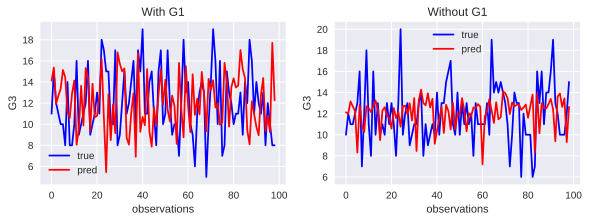

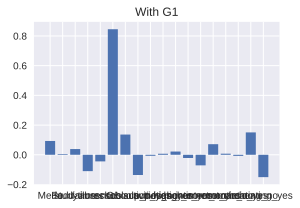

In [79]:
x_poly = PolynomialFeatures(degree=2).fit_transform(X, data['G3'])
model = linear_model.LinearRegression().fit(trainData_X, trainData_Y)
model.fit(trainData_X, trainData_Y)
prediction = model.predict(testData_X)
coef = model.coef_

x_poly = PolynomialFeatures(degree=2).fit_transform(X2, data['G3'])
model = linear_model.LinearRegression().fit(trainData_X2, trainData_Y2)
model.fit(trainData_X2, trainData_Y2)
prediction = model.predict(testData_X2)

characteristics(predictions, testData_Y, predictions2, testData_Y2)
modelplot(testData_Y, predictions, testData_Y2, predictions2, coef)

Полиномиальная регрессиия выдаёт такие же результаты, как и линейная и имеет самый значимый коэфицент G1

### KNN and Radius Neighbors

With G1
MSE:   14.930001791228637
RMSE:  3.8639360490604187
R2:    -0.7005057807017627
MAE:   3.1829603990132855
MedAE: 2.7964020503573863

Without G1
MSE:   9.061680062273508
RMSE:  3.0102624573736936
R2:    -0.338092172529485
MAE:   2.4716003216288347
MedAE: 2.1508578061072186


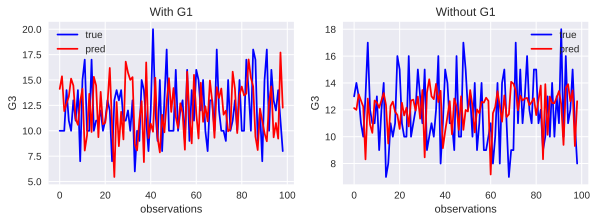

In [80]:
from sklearn.neighbors import KNeighborsRegressor
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

(trainData_X2, testData_X2, trainData_Y2, 
 testData_Y2) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

model = KNeighborsRegressor()
model.fit(trainData_X, trainData_Y)
prediction = model.predict(testData_X)

model = KNeighborsRegressor()
model.fit(trainData_X, trainData_Y)
prediction = model.predict(testData_X)

characteristics(predictions, testData_Y, predictions2, testData_Y2)
modelplot(testData_Y, predictions, testData_Y2, predictions2)

Min M is 4.340241444578247 radius value is 6.5
Min M is 2.251921227985715 radius value is 4.0
With G1
MSE:   16.718696002153717
RMSE:  4.088850205394387
R2:    -0.8425462311291987
MAE:   3.27211114748661
MedAE: 2.7293494432236978

Without G1
MSE:   10.283549538135214
RMSE:  3.2067973958663516
R2:    -0.18430472155554645
MAE:   2.603935542680013
MedAE: 2.318765766638059


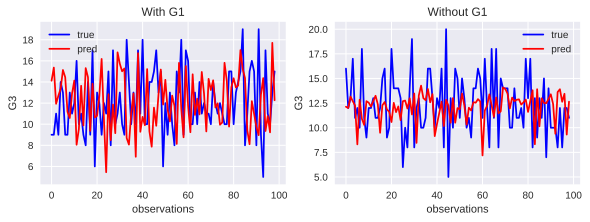

In [81]:
from sklearn.neighbors import RadiusNeighborsRegressor
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

(trainData_X2, testData_X2, trainData_Y2, 
 testData_Y2) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)
mseMin = None
for radius in np.arange(1, 50, 0.5):
        model = RadiusNeighborsRegressor(radius)
        model.fit(trainData_X, trainData_Y)
        prediction = model.predict(testData_X)
        mse = metrics.mean_squared_error(prediction, testData_Y)
        if mseMin is None or mse < mseMin:
          rad = radius
          mseMin = mse
print ('Min M is', mseMin, 'radius value is', rad)
model = RadiusNeighborsRegressor(rad)
model.fit(trainData_X, trainData_Y)
prediction = model.predict(testData_X)

mseMin = None
for radius in np.arange(1, 50, 0.5):
        model = RadiusNeighborsRegressor(radius)
        model.fit(trainData_X2, trainData_Y2)
        prediction = model.predict(testData_X2)
        mse = metrics.mean_squared_error(prediction, testData_Y2)
        if mseMin is None or mse < mseMin:
          rad = radius
          mseMin = mse
print ('Min M is', mseMin, 'radius value is', rad)
model = RadiusNeighborsRegressor(rad)
model.fit(trainData_X2, trainData_Y2)
prediction = model.predict(testData_X2)

characteristics(predictions, testData_Y, predictions2, testData_Y2)
modelplot(testData_Y, predictions, testData_Y2, predictions2)

### Деревья

With G1
MSE:   2.162471706213586
RMSE:  1.4705344967778164
R2:    0.7471206751686137
MAE:   1.1889222246792386
MedAE: 0.9830508474576263

Without G1
MSE:   2.2570928606263676
RMSE:  1.5023624265224313
R2:    0.7090887112949379
MAE:   1.1786959629369
MedAE: 1.0588235294117645


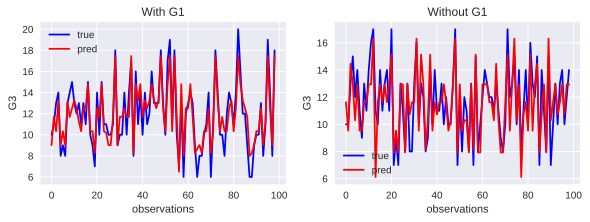

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

(trainData_X2, testData_X2, trainData_Y2, 
 testData_Y2) = train_test_split(X, data['G3'], test_size=0.2, shuffle=True)

model = GridSearchCV(DecisionTreeRegressor(), {'max_depth':[3,4,5,6]})
model.fit(trainData_X, trainData_Y)
predictions = model.predict(testData_X)

model = GridSearchCV(DecisionTreeRegressor(), {'max_depth':[3,4,5,6]})
model.fit(trainData_X2, trainData_Y2)
predictions2 = model.predict(testData_X2)

characteristics(predictions, testData_Y, predictions2, testData_Y2)
modelplot(testData_Y, predictions, testData_Y2, predictions2)

Признак G1 у всех моделей самым значимым и без него модели работают не очень.

Все модели показали примерно одинаковый результат точности в диапозоне 70-80.
Самым слабым оказался метод ближайших соседий KNN.

Деревья показали самый лучший результат.

## Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

In [0]:
X = data.drop(['G1', 'G3'], axis=1)
Y = pd.Series((map(lambda x: 1 if x >= 8 else 0, data['G3'])))

In [0]:
def printHeatmap(testData_Y, predictions): 
  confusion_score = confusion_matrix(testData_Y, predictions)
  sns.heatmap(confusion_score, annot=True)
  plt.title('Confusion Score')
  rcParams['figure.figsize'] = 15, 3
  plt.show()

In [0]:
def roc_line(model, X_test, y_test):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    print(auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

### KNN и Radius Neighbors

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.96      1.00      0.98       283

    accuracy                           0.95       297
   macro avg       0.73      0.53      0.55       297
weighted avg       0.93      0.95      0.94       297

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
roc_auc= 0.5339475012619889


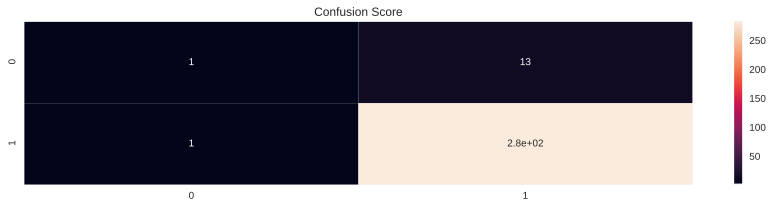

0.6051236749116607


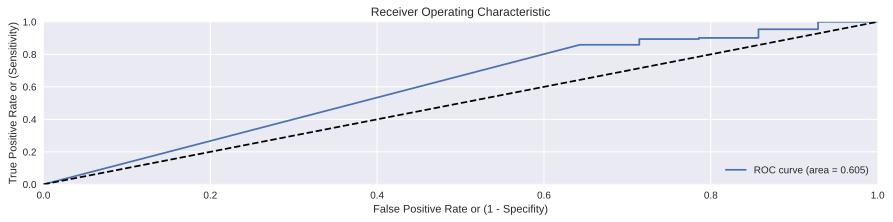

In [108]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.3,  stratify=Y, shuffle=True)

model = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(5, 10), 'weights': ['distance'], 'algorithm': ['ball_tree', 'kd_tree'],
                                                        'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}, scoring='accuracy')
model.fit(trainData_X, trainData_Y)
best_model = model.best_estimator_
predictions = best_model.predict(testData_X)

print(classification_report(testData_Y, predictions))
print(model.best_params_)
print('roc_auc=',roc_auc_score(testData_Y, predictions))
printHeatmap(testData_Y, predictions)
roc_line(best_model, testData_X, testData_Y)

### Логистическая регрессия

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.96      0.99      0.97       189

    accuracy                           0.95       198
   macro avg       0.65      0.55      0.57       198
weighted avg       0.93      0.95      0.94       198

{'max_iter': 1000, 'penalty': 'l2'}
roc_auc= 0.5502645502645502


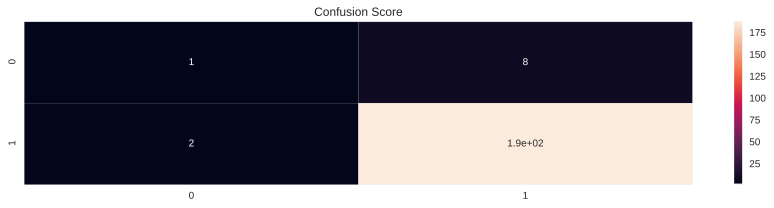

0.7865961199294532


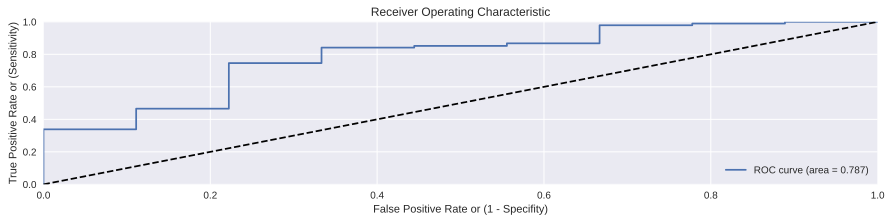

In [114]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

model = GridSearchCV(LogisticRegression(), {'penalty':['l2'], 'max_iter':[1000]})
model.fit(trainData_X, trainData_Y)
best_model = model.best_estimator_
predictions = best_model.predict(testData_X)

print(classification_report(testData_Y, predictions))
print(model.best_params_)
print('roc_auc=',roc_auc_score(testData_Y, predictions))
printHeatmap(testData_Y, predictions)
roc_line(best_model, testData_X, testData_Y)

### Деревья решений

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.95      1.00      0.98       189

    accuracy                           0.95       198
   macro avg       0.48      0.50      0.49       198
weighted avg       0.91      0.95      0.93       198

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1}
roc_auc= 0.5



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


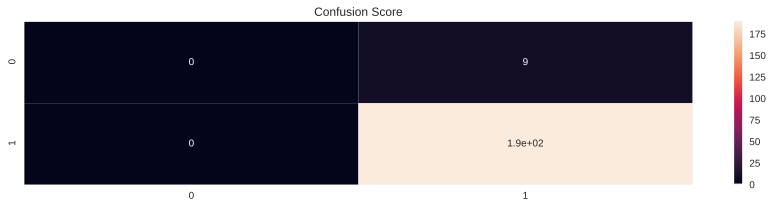

0.6284538506760728


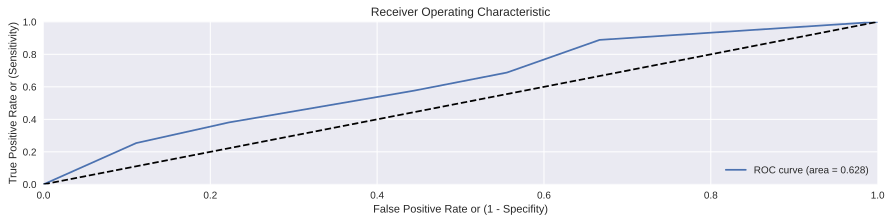

In [124]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

model = GridSearchCV(DecisionTreeClassifier(), {'max_depth':range(3,7), 'criterion': ['entropy'], 'min_samples_split': range(2, 4), 'min_samples_leaf': range(2, 4),'min_weight_fraction_leaf': np.arange(0, 0.5, 0.1)})
model.fit(trainData_X, trainData_Y)
best_model = model.best_estimator_
predictions = best_model.predict(testData_X)

print(classification_report(testData_Y, predictions))
print(model.best_params_)
print('roc_auc=',roc_auc_score(testData_Y, predictions))
print()
printHeatmap(testData_Y, predictions)
roc_line(best_model, testData_X, testData_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.94      1.00      0.97       187

    accuracy                           0.94       198
   macro avg       0.47      0.50      0.49       198
weighted avg       0.89      0.94      0.92       198

roc_auc= 0.5

0.5802139037433155
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.94      0.99      0.97       187

    accuracy                           0.94       198
   macro avg       0.47      0.50      0.48       198
weighted avg       0.89      0.94      0.91       198

roc_auc= 0.49732620320855614

0.6558094312105007
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.96      1.00      0.98       190

    accuracy                           0.96       198
   macro avg       0.48      0.50      0.49   

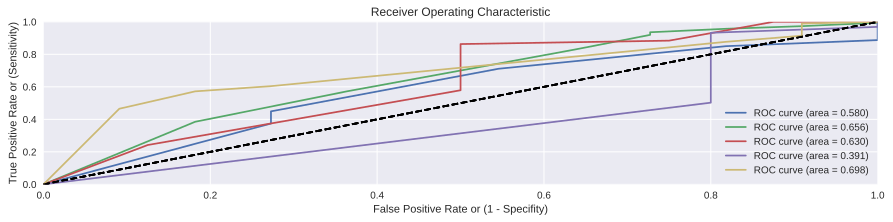

In [129]:
from sklearn.model_selection import KFold

(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

X_np = X.to_numpy()
y_np = Y.to_numpy()

i = 0
treemodels = []
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    trainFold_X = X_np[train]
    trainFold_Y = y_np[train]
    testFold_X = X_np[test]
    testFold_Y = y_np[test]
    model = DecisionTreeClassifier(max_depth=5, criterion="entropy", max_features='log2')
    model.fit(trainFold_X, trainFold_Y)
    predictions = model.predict(testFold_X)
    treemodels.append(model)
    
    print(classification_report(testFold_Y, predictions))
    print('roc_auc=',roc_auc_score(testFold_Y, predictions))
    print()
    roc_line(model, testFold_X, testFold_Y)

In [130]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

estimator = treemodels[3]

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()


The binary tree structure has 45 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 4] <= 2.5 else to node 20.
	node=1 test node: go to node 2 if X[:, 9] <= 0.5 else to node 11.
		node=2 test node: go to node 3 if X[:, 3] <= 1.5 else to node 8.
			node=3 test node: go to node 4 if X[:, 2] <= 1.5 else to node 7.
				node=4 test node: go to node 5 if X[:, 4] <= 1.5 else to node 6.
					node=5 leaf node.
					node=6 leaf node.
				node=7 leaf node.
			node=8 test node: go to node 9 if X[:, 6] <= 0.5 else to node 10.
				node=9 leaf node.
				node=10 leaf node.
		node=11 test node: go to node 12 if X[:, 16] <= 0.5 else to node 13.
			node=12 leaf node.
			node=13 test node: go to node 14 if X[:, 13] <= 0.5 else to node 17.
				node=14 test node: go to node 15 if X[:, 1] <= 3.5 else to node 16.
					node=15 leaf node.
					node=16 leaf node.
				node=17 test node: go to node 18 if X[:, 12] <= 0.5 else to node 19.
					node=18 leaf node.
					node=19 leaf node

**Оценка**

Все модели очень плохо определяю незачеты(0 класс). Наверное они все переобучены.(видимо я где-то косячу)

Лучшей моделью получилась Логистическая регрессия, а хуже всего показал себя метод К соседей.
Кривая у всех положительная, что сильно радует и говорит,что модель не просто случайность. 

Валидация 5-fold не особо что-то изменила. А по auc модель даже упала.

Структуру дерева построил.

С каждой интерацией в 5-fold модель становилась всё лучше.(кроме предпоследнего fold) Итоговый вариант оказался наилучшим.

### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

### Многоклассовая классификация

In [0]:
l1 = list(data.G3.copy())
for i in range(len(l1)):
  if (l1[i] <= 20) and (l1[i]>=18):
    l1[i] = 5
  elif (l1[i] <= 17) and (l1[i]>=14):
    l1[i] = 4
  elif (l1[i] <= 13) and (l1[i]>=8):
    l1[i] = 3
  else:
    l1[i] = 2
data['G4'] = l1

In [0]:
def roc_auc(model, X, y, pred):
    fpr = dict();tpr = dict();roc_auc = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y[:,i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    mauc = 0
    for i in range(4):
      mauc = mauc + roc_auc[i]
    return (mauc/4)

In [0]:
def roc_line(model, X, y, pred):
    fpr = dict();tpr = dict();roc_auc = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc)

    for i in range(4):
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.0])
      plt.xlabel('False Positive Rate or (1 - Specifity)')
      plt.ylabel('True Positive Rate or (Sensitivity)')
      plt.title('Receiver Operating Characteristic')
      plt.legend(loc="lower right")
    plt.show()

In [0]:
X = data.drop(['G1', 'G3', 'G4'], axis=1)
Y = data['G4']
Y = pd.get_dummies(Y)

### KNN и Radius Neighbors

In [0]:
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier

(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

X_np = X.to_numpy()
y_np = Y.to_numpy()

i = 0
knnmodels = []
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(X):
    trainFold_X = X_np[train]
    trainFold_Y = y_np[train]
    testFold_X = X_np[test]
    testFold_Y = y_np[test]
    model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
    model = model.fit(trainFold_X, trainFold_Y)
    predictions = model.predict_proba(testFold_X)
    knnmodels.append(model)

{0: 0.8927101704879483, 1: 0.8023755656108598, 2: 0.8085484720758693, 3: 0.8440538519072551}


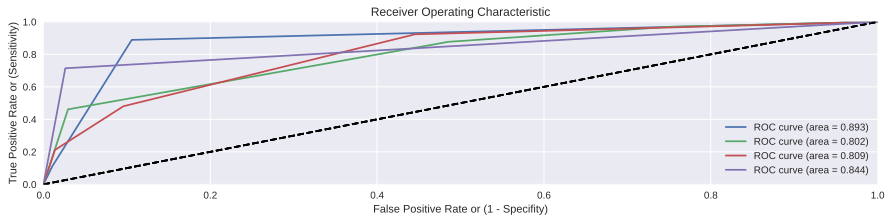

In [138]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

model = knnmodels[3]
predictions2 = model.predict_proba(testData_X.values)
roc_line(model, testData_X.values, testData_Y.values, predictions2)
# print(predictions2)

### Логистическая регрессия

In [0]:
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier

(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

X_np = X.to_numpy()
Y_np = Y.to_numpy()

i = 0
logmodels = []
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(X):
    trainFold_X = X_np[train]
    trainFold_Y = Y_np[train]
    testFold_X = X_np[test]
    testFold_Y = Y_np[test]
    model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
    model = model.fit(trainFold_X, trainFold_Y)
    predictions = model.decision_function(testFold_X)
    logmodels.append(model)

{0: 0.5, 1: 0.6292986425339366, 2: 0.5928609062170705, 3: 0.5}


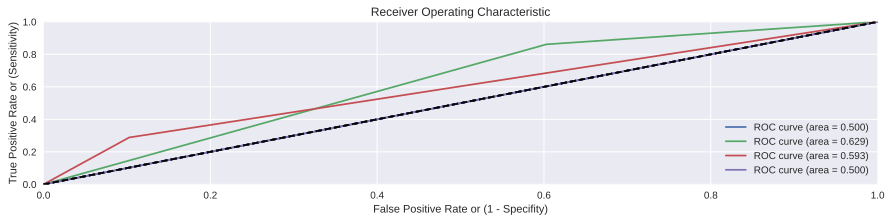

In [162]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

model = logmodels[3]
predictions1 = model.decision_function(testData_X.values)
predictions2 = model.predict(testData_X.values)
roc_line(model, testData_X.values, testData_Y.values, predictions2)

### Деревья решений

{0: 0.5189596499756928, 1: 0.6154926412762611, 2: 0.6741054001301235, 3: 0.4632124352331606}


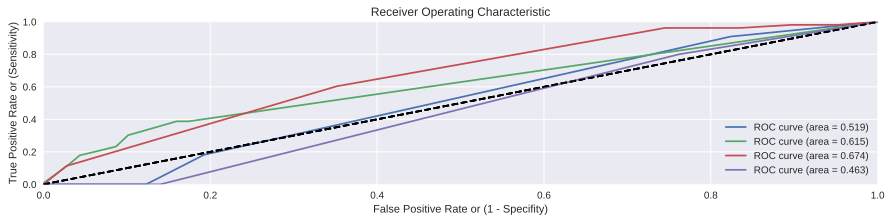

{0: 0.6932425862907147, 1: 0.6083508927581235, 2: 0.6474408436213992, 3: 0.603298611111111}


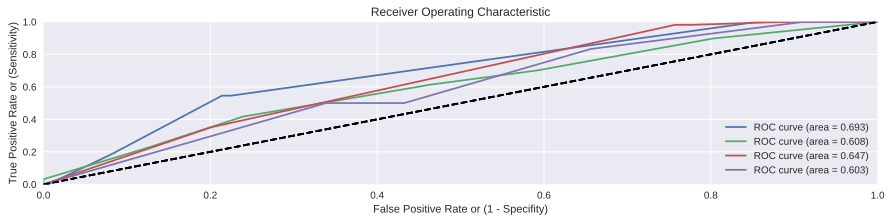

{0: 0.6131578947368422, 1: 0.7251207729468598, 2: 0.6528785679729077, 3: 0.66008316008316}


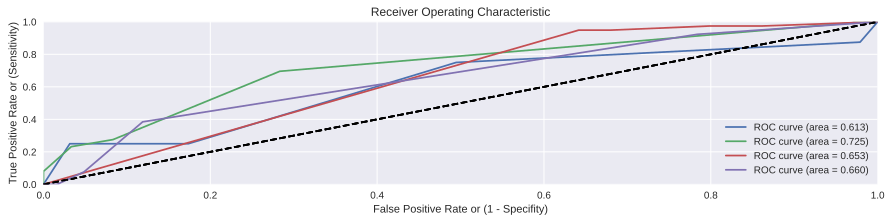

{0: 0.6471502590673575, 1: 0.630995475113122, 2: 0.6332586786114222, 3: 0.6128472222222223}


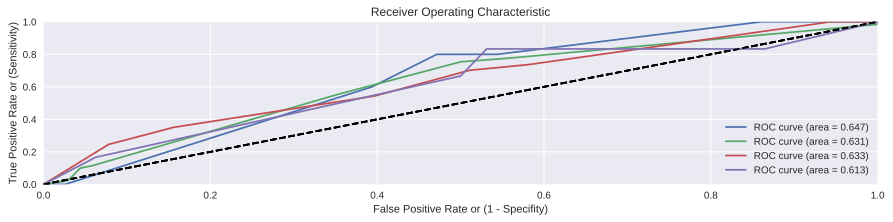

{0: 0.6990763247447739, 1: 0.5830577601410935, 2: 0.6725352112676057, 3: 0.6632124352331605}


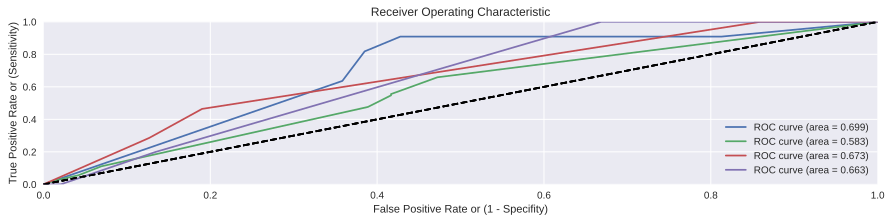

{0: 0.5043753038405445, 1: 0.544994944388271, 2: 0.6843851659076122, 3: 0.638860103626943}


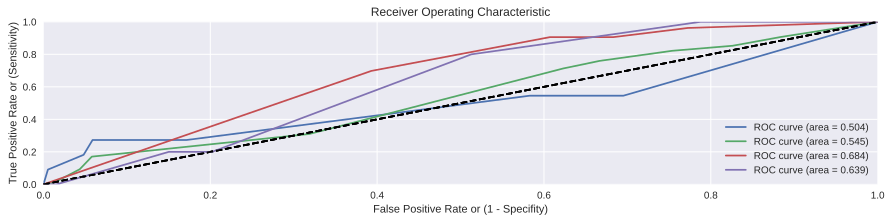

{0: 0.7802625182304327, 1: 0.6062437617832983, 2: 0.6379886831275721, 3: 0.7339409722222223}


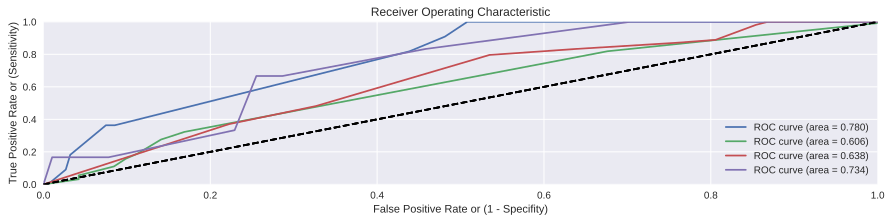

{0: 0.6467105263157895, 1: 0.678683574879227, 2: 0.7045637800354783, 3: 0.7174636174636174}


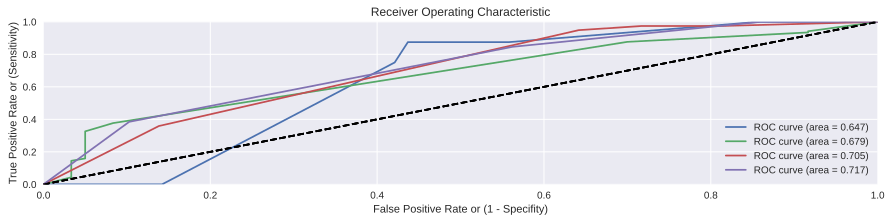

{0: 0.5383419689119171, 1: 0.653846153846154, 2: 0.6232425034216748, 3: 0.6480034722222222}


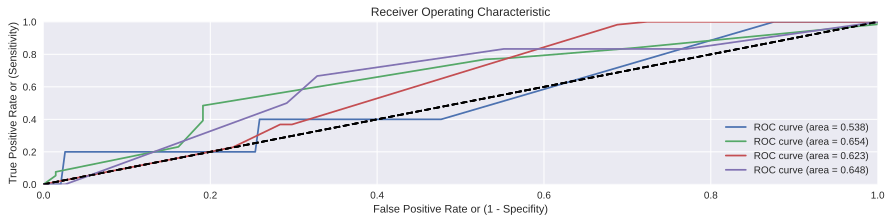

{0: 0.6234807972775888, 1: 0.5774911816578483, 2: 0.6224849094567405, 3: 0.6642487046632125}


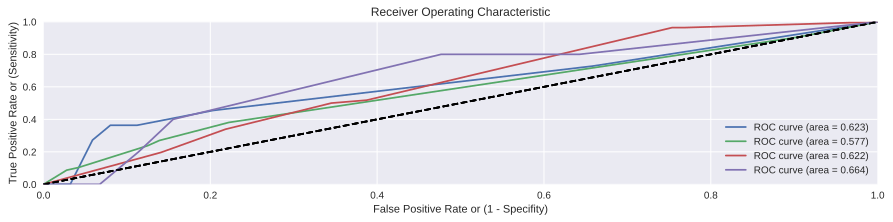

{0: 0.5481283422459893, 1: 0.5695989214694979, 2: 0.6234873129473, 3: 0.483419689119171}


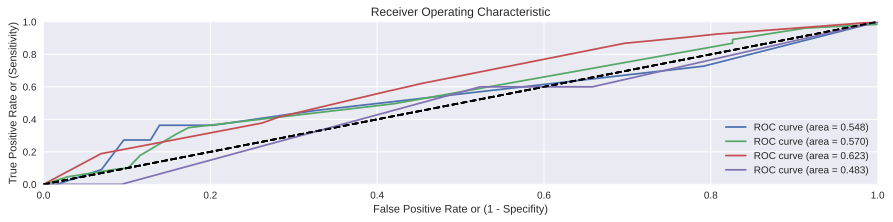

{0: 0.7058823529411766, 1: 0.5858378618165687, 2: 0.6837705761316872, 3: 0.5295138888888888}


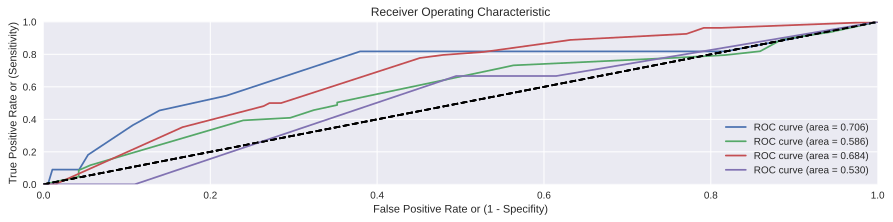

{0: 0.5638157894736842, 1: 0.6721014492753623, 2: 0.7522980164489599, 3: 0.5501039501039501}


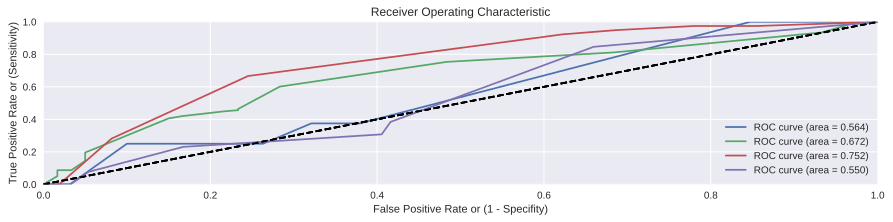

{0: 0.3233160621761658, 1: 0.6977941176470588, 2: 0.7333582182406371, 3: 0.5703125}


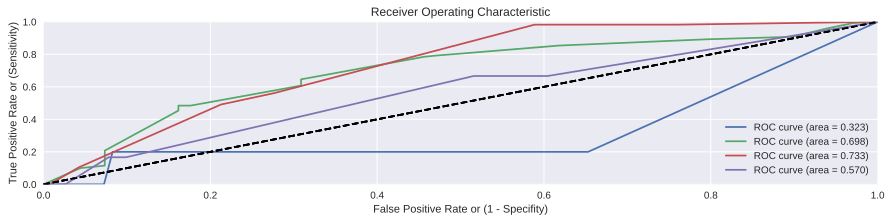

{0: 0.7345649003403014, 1: 0.5676807760141094, 2: 0.7077464788732395, 3: 0.7471502590673575}


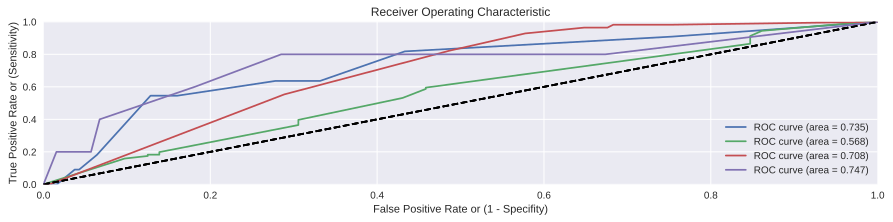

{0: 0.5068060281964025, 1: 0.6116166722840131, 2: 0.6643461288223813, 3: 0.5404145077720207}


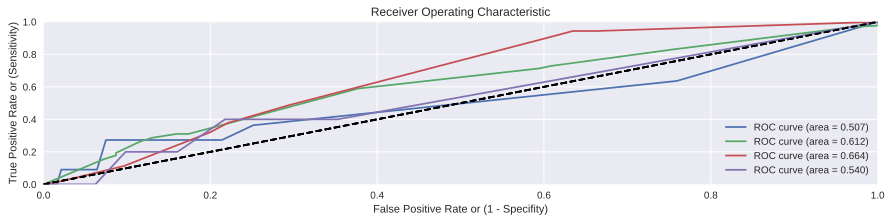

{0: 0.5554205153135634, 1: 0.6004768770100921, 2: 0.7209362139917694, 3: 0.6440972222222222}


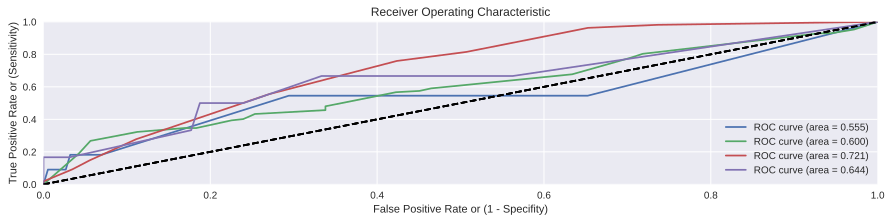

{0: 0.7134868421052631, 1: 0.7053743961352656, 2: 0.6419932268988873, 3: 0.5349272349272349}


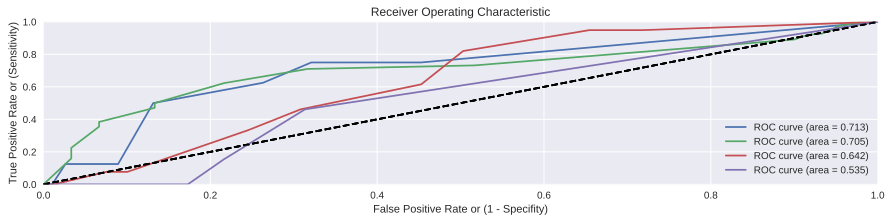

{0: 0.6129533678756478, 1: 0.6419117647058824, 2: 0.710401891252955, 3: 0.7174479166666666}


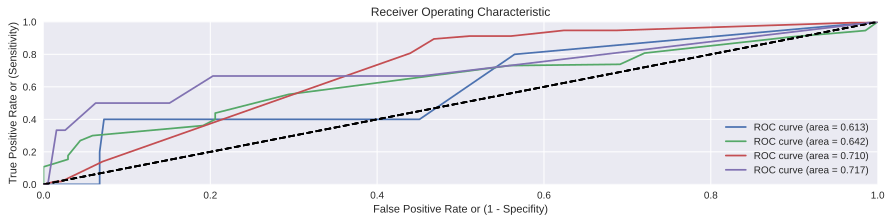

{0: 0.7007778317938747, 1: 0.5922619047619048, 2: 0.6711519114688129, 3: 0.7559585492227979}


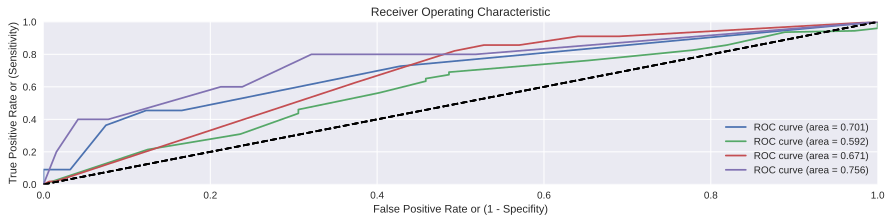

{0: 0.5614973262032086, 1: 0.5237052016627345, 2: 0.680156148340924, 3: 0.6626943005181347}


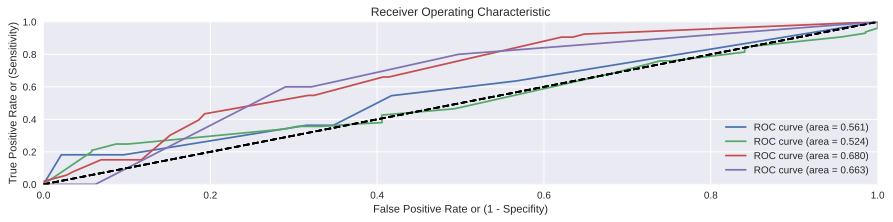

{0: 0.8454059309674282, 1: 0.6116224908506156, 2: 0.6995241769547325, 3: 0.7526041666666666}


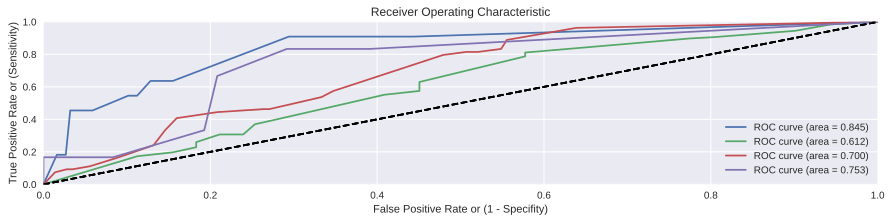

{0: 0.7884868421052633, 1: 0.7103864734299518, 2: 0.7018222867279471, 3: 0.6796257796257796}


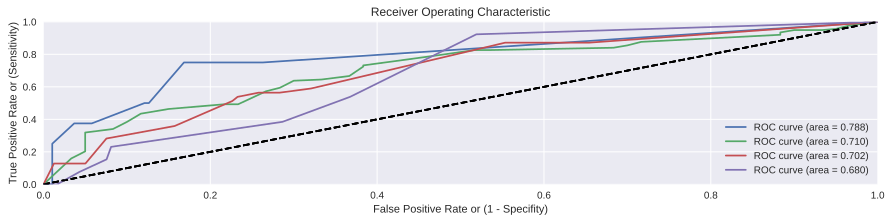

{0: 0.42797927461139895, 1: 0.6897058823529413, 2: 0.7227199203682966, 3: 0.6254340277777777}


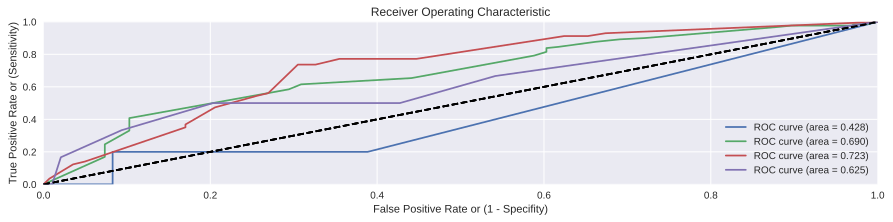

{0: 0.6468157510938259, 1: 0.6516754850088183, 2: 0.6843561368209256, 3: 0.7626943005181348}


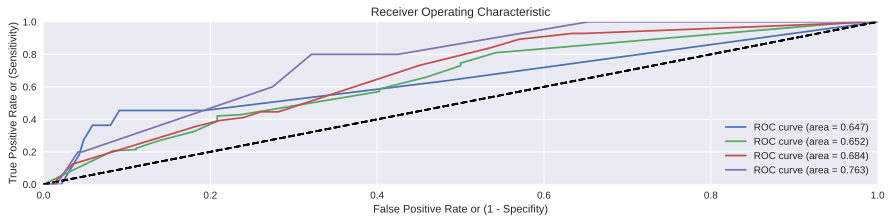

{0: 0.3643655809431211, 1: 0.5790922368273228, 2: 0.6364996746909564, 3: 0.5854922279792747}


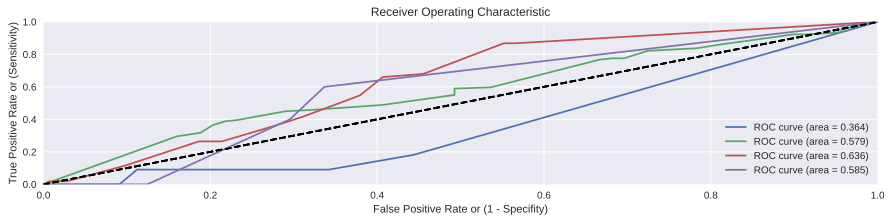

{0: 0.6383082158483228, 1: 0.7026727292891205, 2: 0.6526491769547325, 3: 0.49435763888888895}


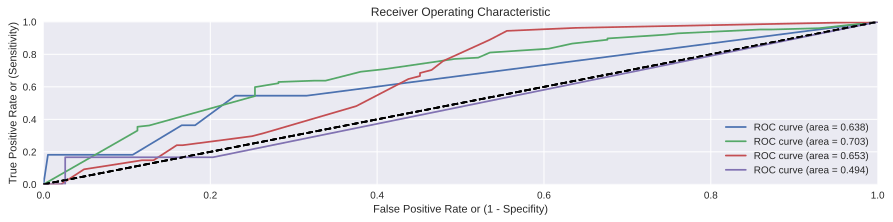

{0: 0.6756578947368421, 1: 0.7126811594202898, 2: 0.7380261248185777, 3: 0.5095634095634095}


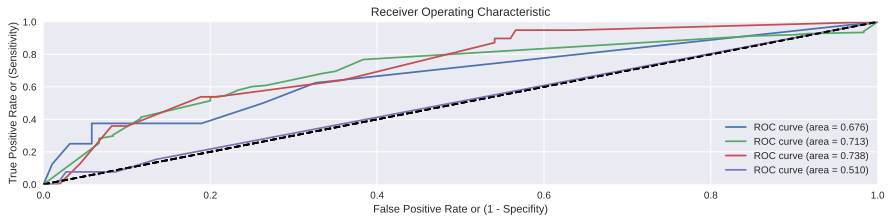

{0: 0.5518134715025906, 1: 0.5884615384615385, 2: 0.685330347144457, 3: 0.6766493055555555}


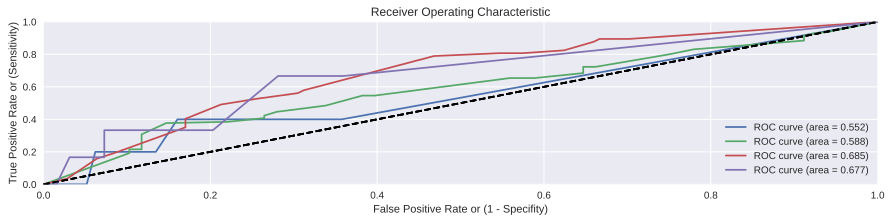

{0: 0.5568789499270782, 1: 0.5644841269841269, 2: 0.6868083501006036, 3: 0.6849740932642487}


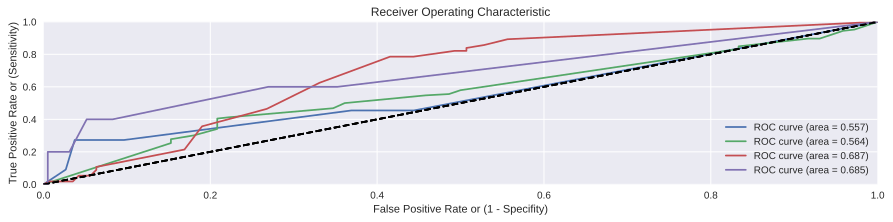

{0: 0.5437530384054449, 1: 0.6271205482530053, 2: 0.6864671437865972, 3: 0.5295336787564766}


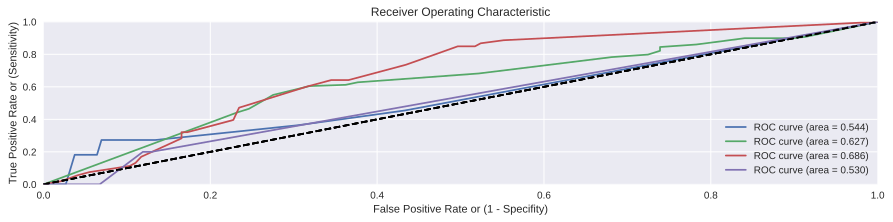

{0: 0.6555663587749149, 1: 0.6170566707330598, 2: 0.7250514403292181, 3: 0.4518229166666667}


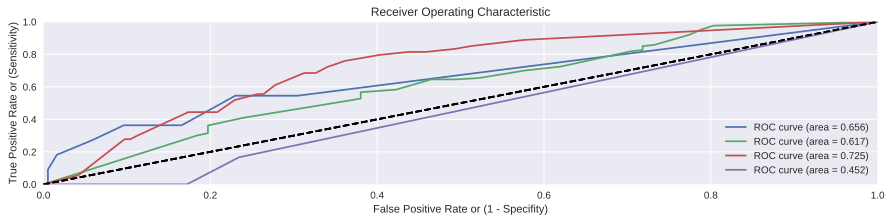

{0: 0.5226973684210526, 1: 0.652596618357488, 2: 0.6846476374778261, 3: 0.5411642411642412}


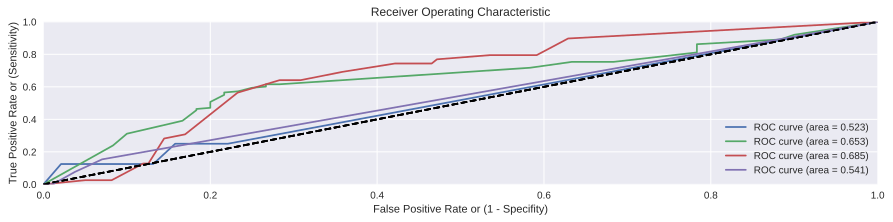

{0: 0.38860103626943004, 1: 0.622341628959276, 2: 0.7961926091825309, 3: 0.6440972222222222}


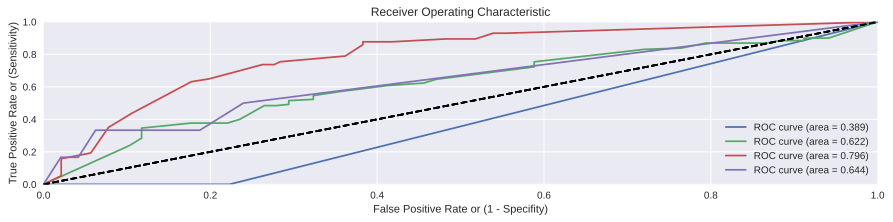

{0: 0.5238210986874089, 1: 0.5679012345679012, 2: 0.6873742454728371, 3: 0.7036269430051814}


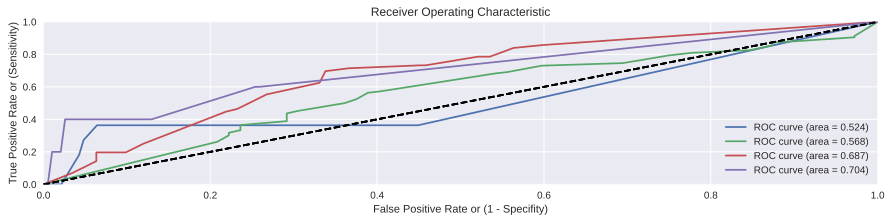

In [184]:
from sklearn.model_selection import KFold

(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

X_np = X.to_numpy()
Y_np = Y.to_numpy()

bauc = None
i = 0
treemodels = []
kf = KFold(n_splits=5)
for i in range(3,10):
  for train, test in kf.split(X_np):
    trainFold_X = X_np[train]
    trainFold_Y = Y_np[train]
    testFold_X = X_np[test]
    testFold_Y = Y_np[test]
    model = OneVsRestClassifier(DecisionTreeClassifier(max_depth=i, criterion="entropy", max_features='log2'))
    model.fit(trainFold_X, trainFold_Y)
    predictions = model.predict_proba(testFold_X)
    treemodels.append(model)
    mauc = roc_auc(model, testFold_X, testFold_Y, predictions)
    roc_line(model, testFold_X, testFold_Y, predictions)
    if bauc is None or bauc < mauc:
      bauc=mauc
      bmodel = model

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.76      0.86      0.81       130
           2       0.29      0.08      0.12        52
           3       0.50      0.14      0.22         7

   micro avg       0.72      0.60      0.65       198
   macro avg       0.55      0.33      0.37       198
weighted avg       0.62      0.60      0.59       198
 samples avg       0.57      0.60      0.58       198

roc_auc= 0.5887269078897232

{0: 0.6084656084656085, 1: 0.6734162895927602, 2: 0.5042149631190727, 3: 0.568810770381451}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


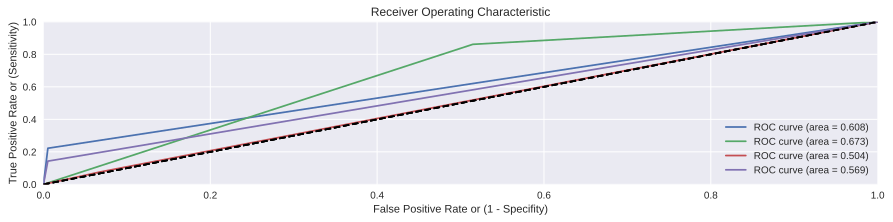

In [185]:
(trainData_X, testData_X, trainData_Y, 
 testData_Y) = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

predictions = bmodel.predict(testData_X.values)
print(classification_report(testData_Y.values, predictions))
print('roc_auc=',roc_auc_score(testData_Y.values, predictions))
print()
roc_line(model, testFold_X, testData_Y.values, predictions)

Во всех моделях лучше всего определяется 1 и 2 класс(удовл и хорошо). Я так понимаю это потому что в данных очень много именно таких оценок.

Лучшей из моделей оказалась KNN. Все остальные показывали лишь небольшие положительные отклонения от 0.5.

Глубина дерева наверное не особо сильно меняет модель, т.к эти изменения лишь колебляться вокруг середины.


## Notes  
  
* Для оценки качества моделей используйте соответствующие задаче метрики, которые рассматривались на занятиях. Для кросс-валидации выберите ту метрику, которая кажется вам наиболее подходящей и аргументируйте свой выбор.  
  
  
* __Tip:__ Возможно, будет полезно решать задачи и строить модели отдельно для каждого предмета, а не для целого датасета.  
  
  
* __Бонусное задание:__ Попробуйте применить другие модели для решения задачи регресии или классификации. Например, Random Forest.